In [1]:
repo_url = "https://github.com/SkalskiP/yolov9.git"

In [2]:
import os

yolov9_dir = os.path.join(os.getcwd(),"YOLOv9")

if os.path.exists(yolov9_dir):
    print(f"{yolov9_dir} already exists")
    print(f"List of directories in cwd: {os.listdir(os.getcwd())}")
else:
    os.mkdir(yolov9_dir)
    print(f"List of directories in cwd: {os.listdir(os.getcwd())}")

List of directories in cwd: ['YOLOv9', '__notebook__.ipynb']


In [3]:
# !git config --global --unset http.proxy
# !git config --global --unset https.proxy

In [4]:
import subprocess

if os.listdir(yolov9_dir):
    print(f"Already cloned \nList of directories: {os.listdir(yolov9_dir)}")
else:    
    subprocess.run(["git", "clone", repo_url, yolov9_dir], check=True)
    print(f"Cloned succussfully \nList of directories: {os.listdir(yolov9_dir)}")

Cloning into '/kaggle/working/YOLOv9'...


Cloned succussfully 
List of directories: ['val_triple.py', 'export.py', 'classify', 'val.py', 'requirements.txt', 'hubconf.py', 'scripts', '.git', 'detect.py', 'benchmarks.py', 'train_dual.py', 'data', 'segment', 'models', 'panoptic', 'README.md', 'train_triple.py', 'utils', 'figure', 'val_dual.py', 'train.py']


In [5]:
requirements_file = os.path.join(yolov9_dir, "requirements.txt")

if os.path.isfile(requirements_file):
    print(f"requirements for YOLOv9 is installing from: {requirements_file}")
    subprocess.run(["pip", "install", "-r", requirements_file, "-q"], check=True)
    print("Installed succussfully")
else:
    print(f"couldn't locate the file {requirements_file}. \nmake sure if it exists, or check if you set the path correctly")

requirements for YOLOv9 is installing from: /kaggle/working/YOLOv9/requirements.txt
Installed succussfully


In [6]:
!nvidia-smi

Wed Dec 11 12:02:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# print(os.listdir("/kaggle/input/cardetection/car"))
# print(os.listdir("/kaggle/input/cardetection/car/train"))

In [8]:
train_images_dir = "/kaggle/input/cardetection/car/train/images"
train_labels_dir = "/kaggle/input/cardetection/car/train/labels"

In [9]:
print(f"number of images in {train_images_dir} is: {len(os.listdir(train_images_dir))}")
print(f"number of images in {train_labels_dir} is: {len(os.listdir(train_labels_dir))}")

number of images in /kaggle/input/cardetection/car/train/images is: 3530
number of images in /kaggle/input/cardetection/car/train/labels is: 3530


In [10]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import math

def show_sample(imgNumb, imgDir):
    images = os.listdir(imgDir)
    fig, axs = plt.subplots(math.ceil(imgNumb/3), 3, figsize=(15,25))
    fig.suptitle("randomly selected images from the training data", fontsize = 20, fontweight = "bold", color = "black")
    
    for i in range(math.ceil(imgNumb/3)):
        rand_sample = random.sample(images, 3)
        for j, imgName in enumerate(rand_sample):
            imgPath = os.path.join(imgDir,imgName)
            try:
                img = Image.open(imgPath)
                axs[i][j].imshow(img)
            except IOError:
                print(f"Failed to load image {imgName}")
                
    plt.subplots_adjust(top=0.95)
    plt.show()

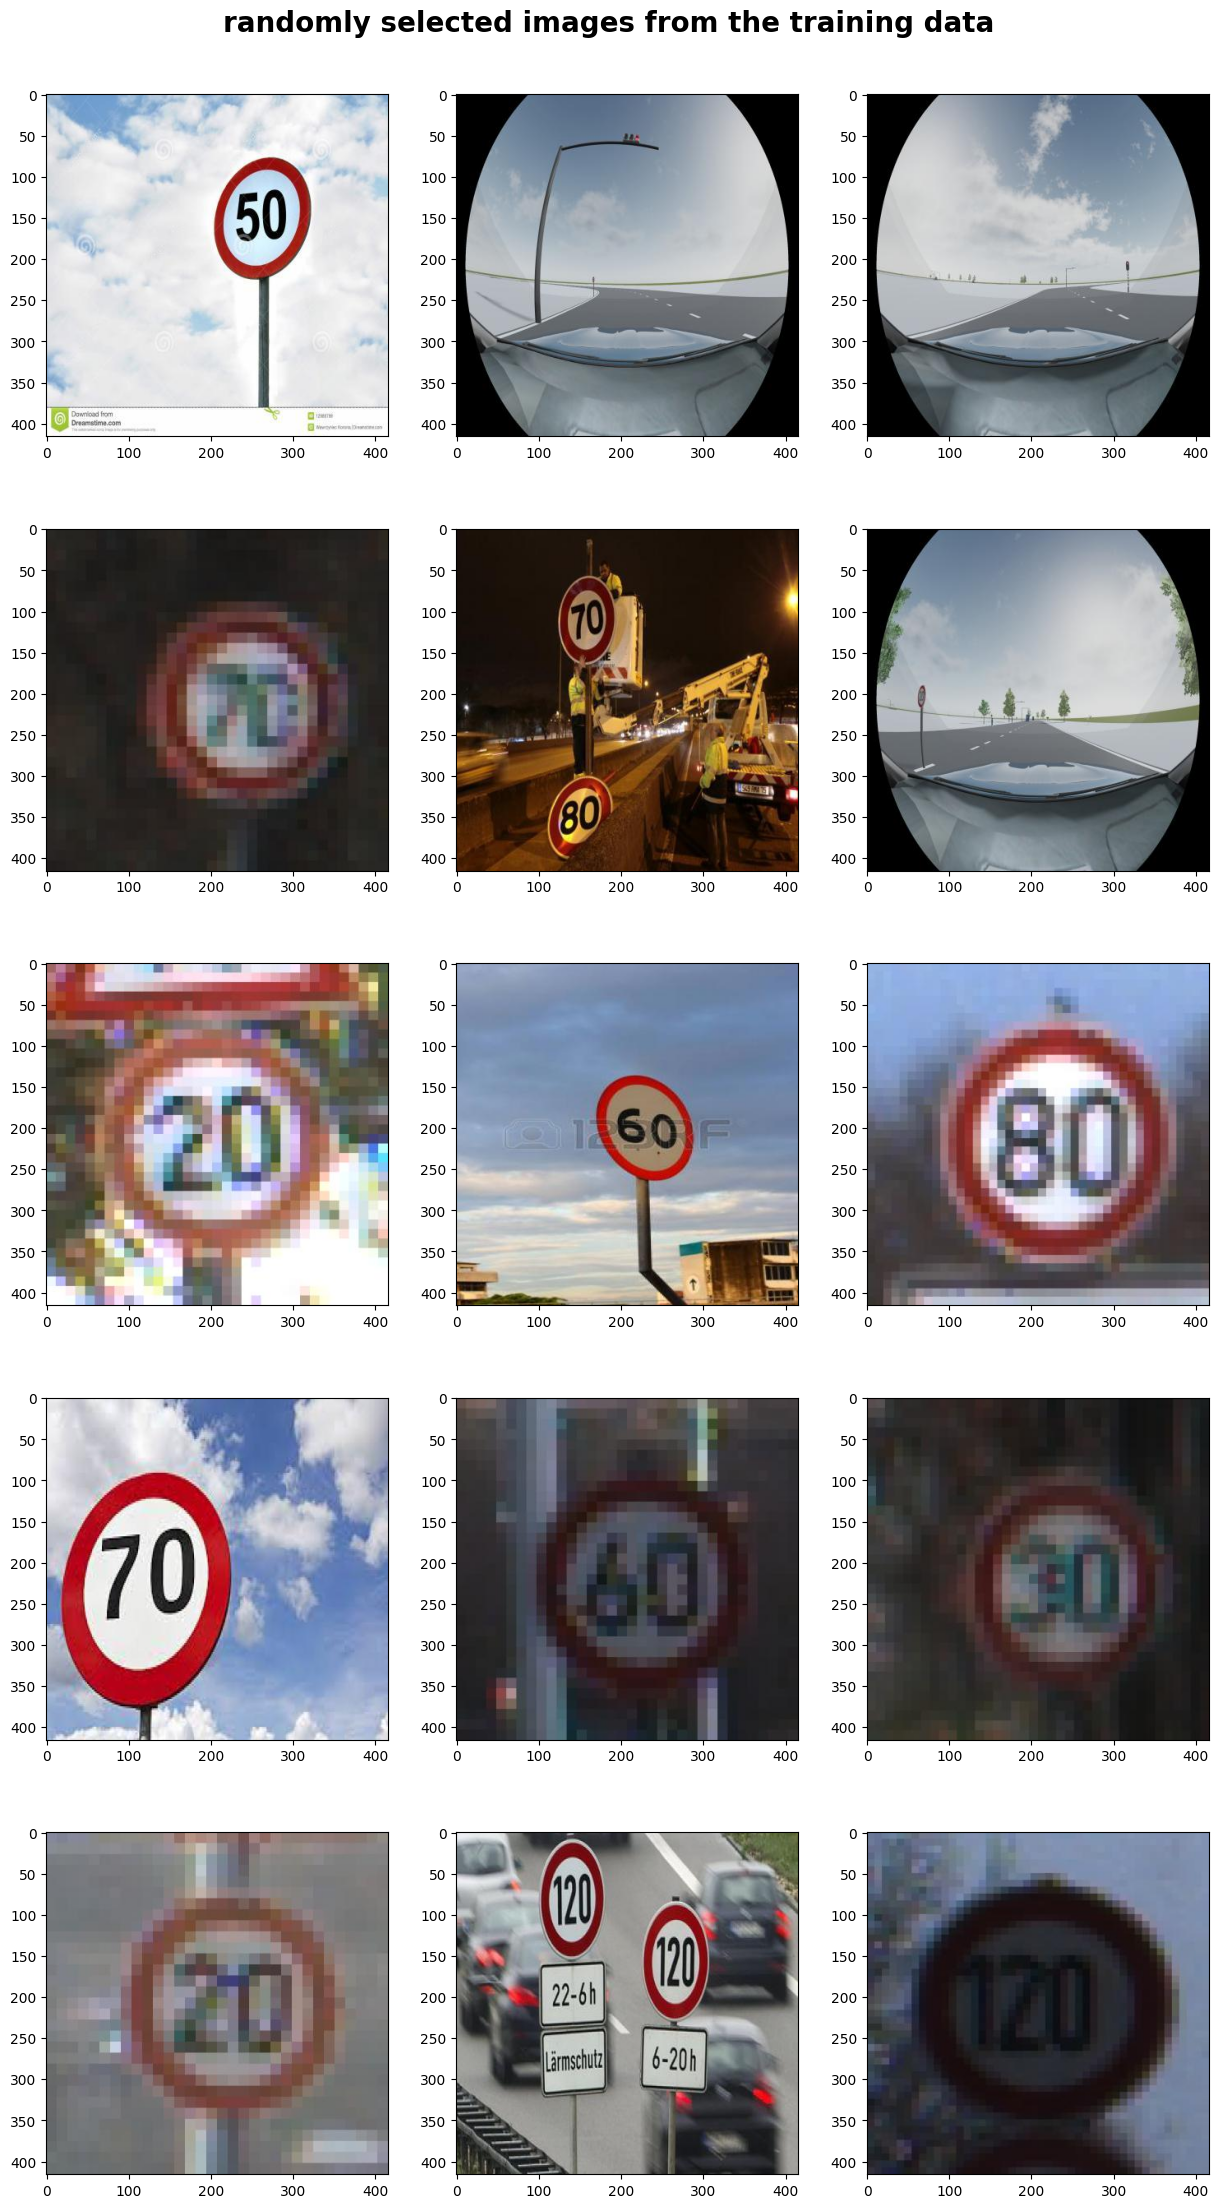

In [11]:
show_sample(15, train_images_dir)

In [12]:
import cv2

image = cv2.imread(os.path.join(train_images_dir, os.listdir(train_images_dir)[0]))

height, width, c = image.shape
print(f"The image has dimensions {height}x{width} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [13]:
os.listdir("/kaggle/input/cardetection/car/")

['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'valid',
 'test',
 'train']

# Training:

In [14]:
yaml_text = """
train: /kaggle/input/cardetection/car/train/images
val: /kaggle/input/cardetection/car/valid/images
test: /kaggle/input/cardetection/car/test/images

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

roboflow:
  workspace: selfdriving-car-qtywx
  project: self-driving-cars-lfjou
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6
"""

yaml_file_path = "/kaggle/working/data2.yaml"
with open(yaml_file_path, 'w') as file:
    file.write(yaml_text)

with open(yaml_file_path) as f:
    contents = f.read()
    print(contents)


train: /kaggle/input/cardetection/car/train/images
val: /kaggle/input/cardetection/car/valid/images
test: /kaggle/input/cardetection/car/test/images

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

roboflow:
  workspace: selfdriving-car-qtywx
  project: self-driving-cars-lfjou
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6



In [15]:
command = [
    "python", os.path.join(yolov9_dir,"train_dual.py"),
    "--workers", "8",
    "--device", "0,1",
    "--batch", "16",
    "--epochs", "50",
    "--min-items", "0",
    "--close-mosaic", "15",
    "--data", "/kaggle/working/data2.yaml",
    "--img", "416",
    "--cfg", os.path.join(yolov9_dir, "models/detect/yolov9-e.yaml"),
    "--weights", "",
    "--name", "yolov9",
    "--hyp", os.path.join(yolov9_dir, "data/hyps/hyp.scratch-high.yaml")
]

In [16]:
subprocess.run(command, check=True)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
train_dual: weights=, cfg=/kaggle/working/YOLOv9/models/detect/yolov9-e.yaml, data=/kaggle/working/data2.yaml, hyp=/kaggle/working/YOLOv9/data/hyps/hyp.scratch-high.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0,1, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=YOLOv9/runs/train, name=yolov9, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                             CUDA:1 (Tesla T4, 15095

CompletedProcess(args=['python', '/kaggle/working/YOLOv9/train_dual.py', '--workers', '8', '--device', '0,1', '--batch', '16', '--epochs', '50', '--min-items', '0', '--close-mosaic', '15', '--data', '/kaggle/working/data2.yaml', '--img', '416', '--cfg', '/kaggle/working/YOLOv9/models/detect/yolov9-e.yaml', '--weights', '', '--name', 'yolov9', '--hyp', '/kaggle/working/YOLOv9/data/hyps/hyp.scratch-high.yaml'], returncode=0)

## Training Results:

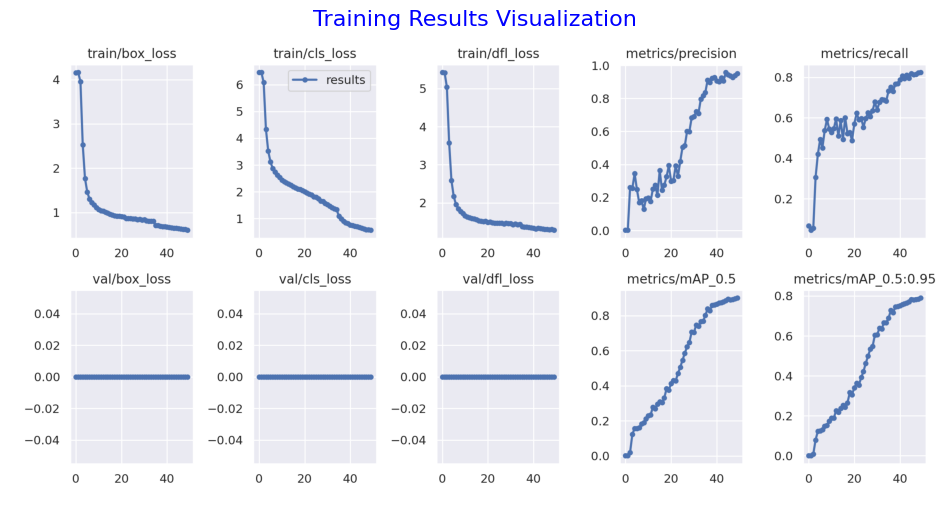

In [17]:
result_img = "/kaggle/working/YOLOv9/runs/train/yolov9/results.png"

img = Image.open(result_img)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

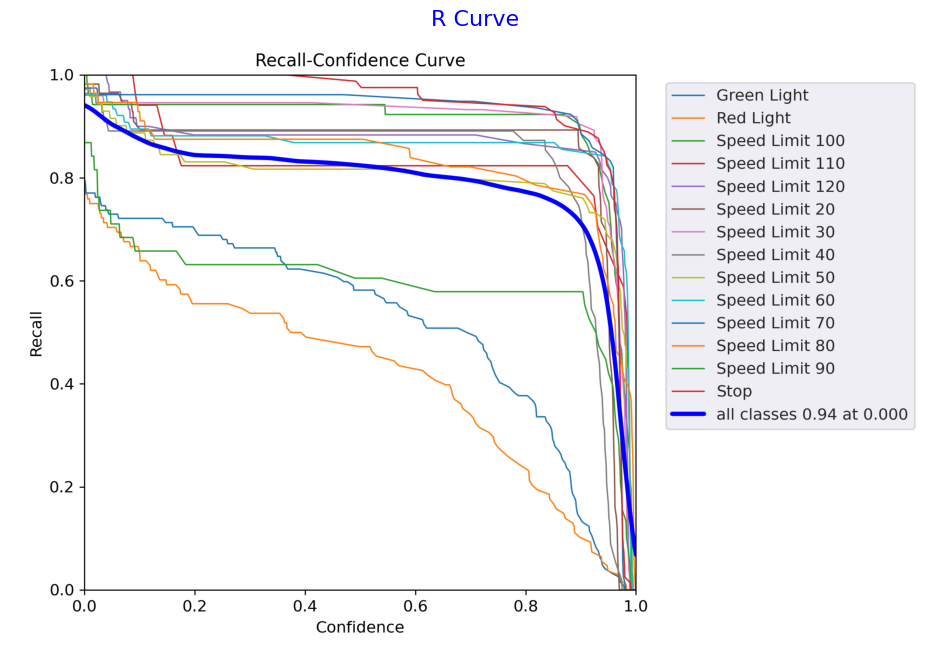

In [18]:
rCurve = "/kaggle/working/YOLOv9/runs/train/yolov9/R_curve.png"

img = Image.open(rCurve)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("R Curve", fontsize=16, color='blue')
plt.show()

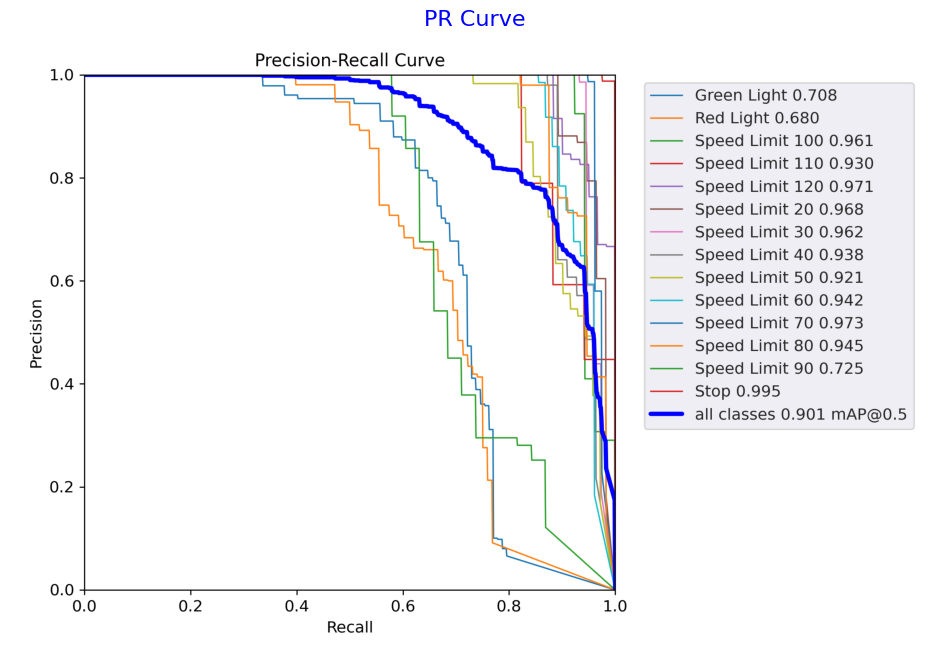

In [19]:
prCurve = "/kaggle/working/YOLOv9/runs/train/yolov9/PR_curve.png"

img = Image.open(prCurve)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("PR Curve", fontsize=16, color='blue')
plt.show()

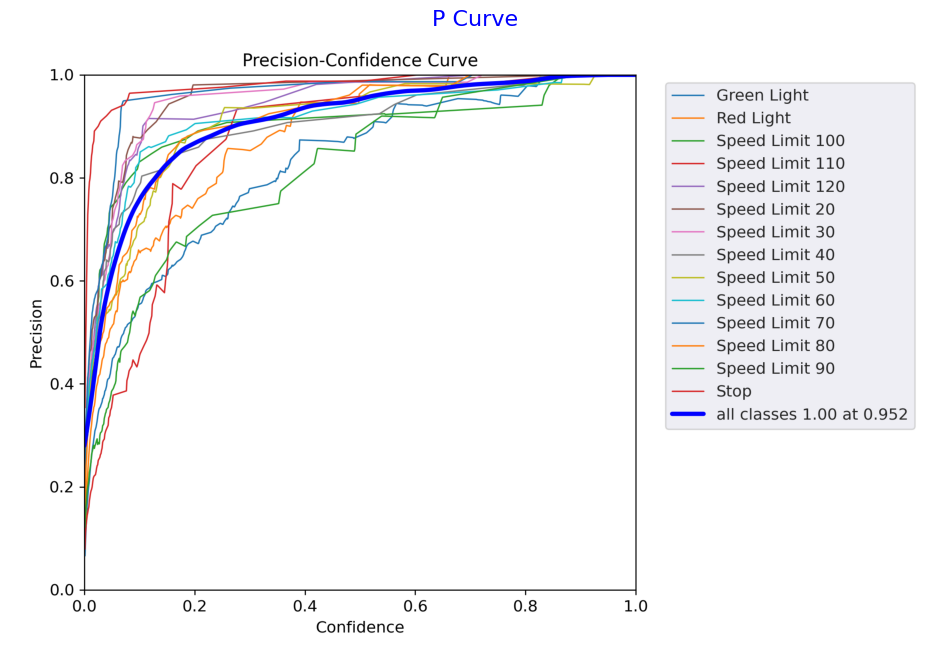

In [20]:
pCurve = "/kaggle/working/YOLOv9/runs/train/yolov9/P_curve.png"

img = Image.open(pCurve)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("P Curve", fontsize=16, color='blue')
plt.show()

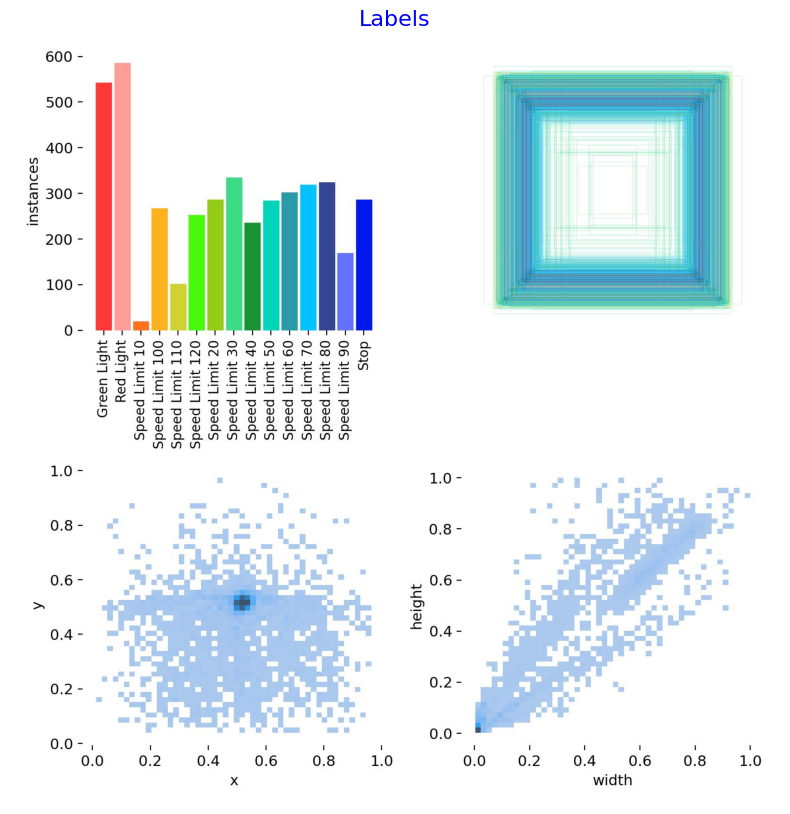

In [21]:
labels = "/kaggle/working/YOLOv9/runs/train/yolov9/labels.jpg"

img = Image.open(labels)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Labels", fontsize=16, color='blue')
plt.show()

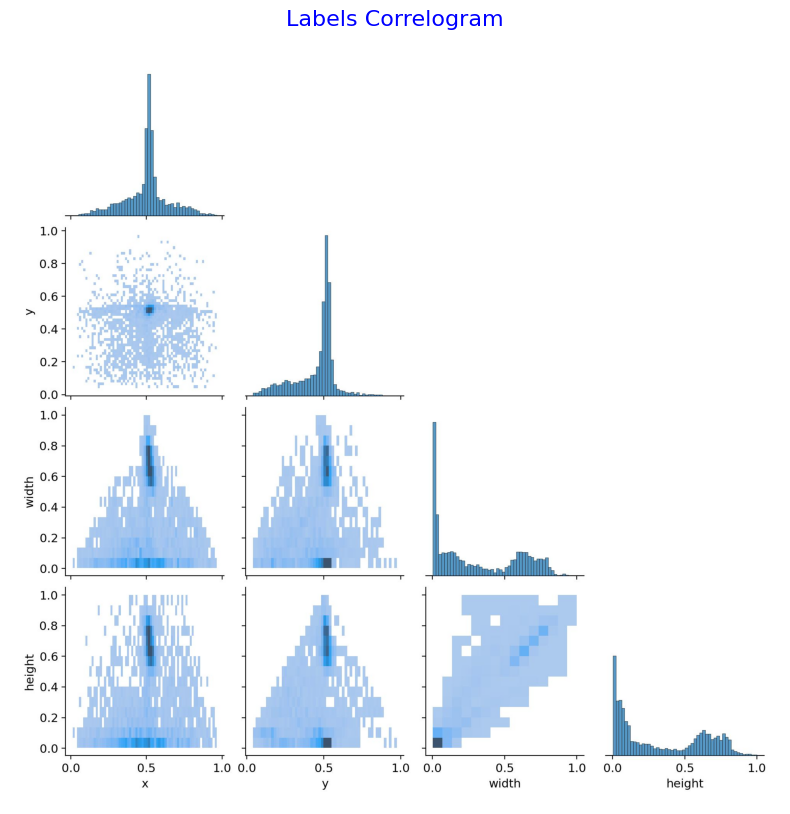

In [22]:
labels_correlogram = "/kaggle/working/YOLOv9/runs/train/yolov9/labels_correlogram.jpg"

img = Image.open(labels_correlogram)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Labels Correlogram", fontsize=16, color='blue')
plt.show()

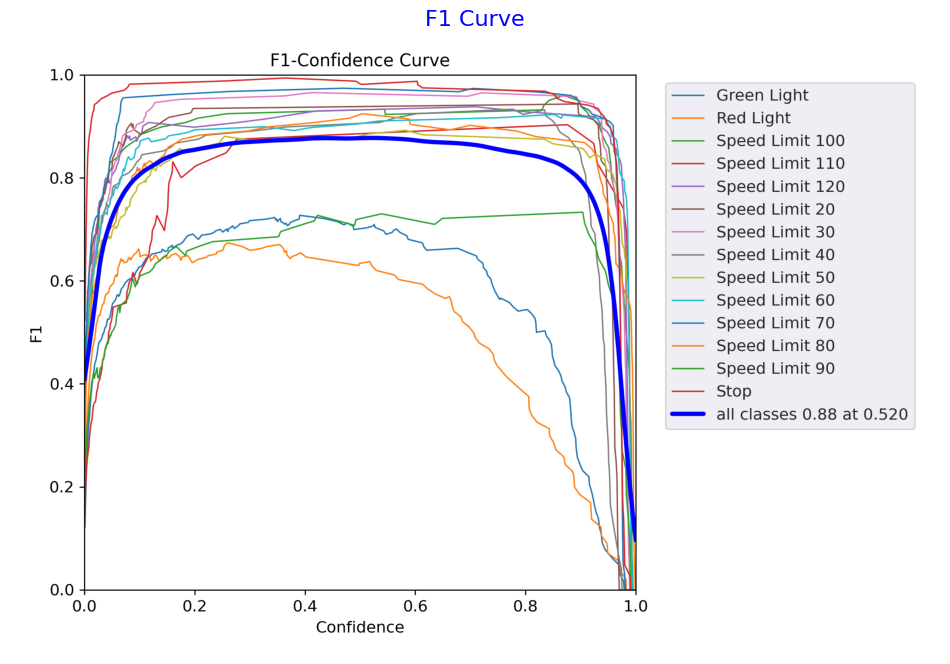

In [23]:
f1Curve = "/kaggle/working/YOLOv9/runs/train/yolov9/F1_curve.png"

img = Image.open(f1Curve)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("F1 Curve", fontsize=16, color='blue')
plt.show()

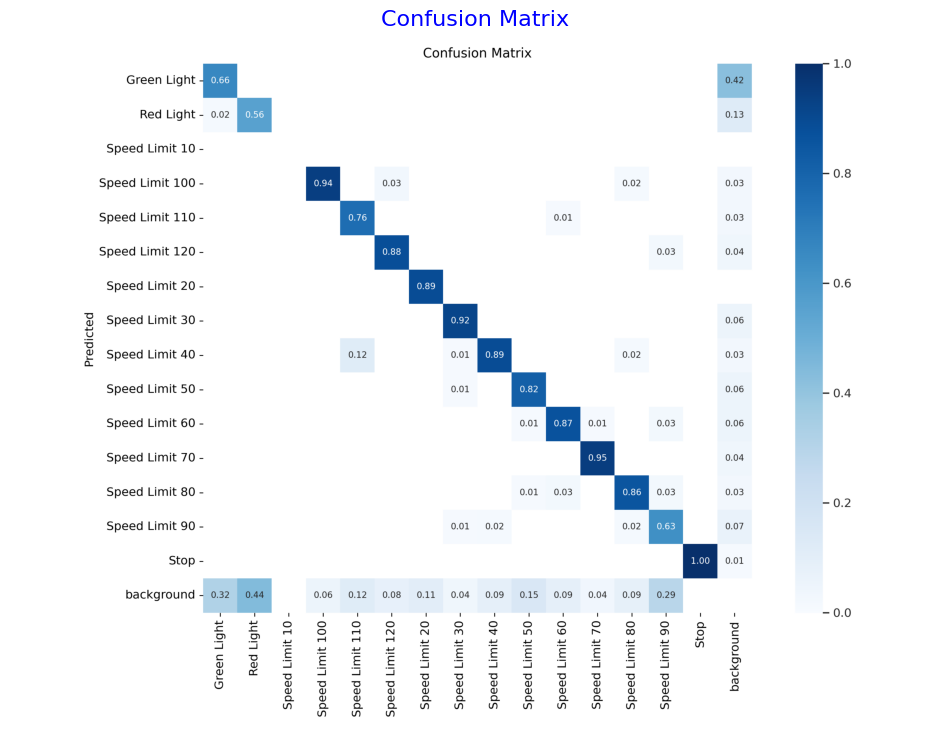

In [24]:
confusion_matrix = "/kaggle/working/YOLOv9/runs/train/yolov9/confusion_matrix.png"

img = Image.open(confusion_matrix)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix", fontsize=16, color='blue')
plt.show()

In [25]:
import pandas as pd

results_csv = "/kaggle/working/YOLOv9/runs/train/yolov9/results.csv"

dataframe = pd.read_csv(results_csv)

dataframe

epoch        train/box_loss        train/cls_loss  \
0                      0               4.15250               6.45320   
1                      1               4.16180               6.45810   
2                      2               3.95370               6.08120   
3                      3               2.52960               4.33240   
4                      4               1.76560               3.52030   
5                      5               1.45860               3.11330   
6                      6               1.30060               2.86460   
7                      7               1.22140               2.73430   
8                      8               1.17040               2.62360   
9                      9               1.10630               2.54160   
10                    10               1.06820               2.43820   
11                    11               1.03800               2.37560   
12                    12               1.02870               2.33730   
13                    13               1.00230               2.28680   
14                    14               0.98994               2.25550   
15                    15               0.96231               2.19360   
16                    16               0.94728               2.15220   
17                    17               0.92458               2.10080   
18                    18               0.91568               2.08720   
19                    19               0.91692               2.04210   
20                    20               0.90951               1.99960   
21                    21               0.90036               1.96510   
22                    22               0.86899               1.91110   
23                    23               0.86909               1.88870   
24                    24               0.86878               1.81130   
25                    25               0.85868               1.79550   
26                    26               0.85723               1.73680   
27                    27               0.84208               1.66330   
28                    28               0.84846               1.63870   
29                    29               0.83217               1.56410   
30                    30               0.83847               1.51900   
31                    31               0.81740               1.47180   
32                    32               0.80658               1.40390   
33                    33               0.80461               1.37250   
34                    34               0.80439               1.33110   
35                    35               0.70815               1.09470   
36                    36               0.70489               0.98894   
37                    37               0.69248               0.90587   
38                    38               0.68238               0.85017   
39                    39               0.68159               0.81503   
40                    40               0.67191               0.76489   
41                    41               0.66368               0.74229   
42                    42               0.65905               0.71844   
43                    43               0.64935               0.70149   
44                    44               0.64753               0.66784   
45                    45               0.63814               0.63862   
46                    46               0.62625               0.61686   
47                    47               0.62393               0.58131   
48                    48               0.62453               0.59137   
49                    49               0.60123               0.56758   

          train/dfl_loss     metrics/precision        metrics/recall  \
0                 5.4233              0.002913              0.066255   
1                 5.4160              0.001981              0.045075   
2                 5.0382              0.260900              0.055770   
3                 3.5719              0.256710            

# Testing

In [26]:
command = [
    "python", os.path.join(yolov9_dir,"detect.py"),
    "--weights", os.path.join(yolov9_dir,"runs/train/yolov9/weights/best.pt"),
    "--conf", "0.7",
    "--source", "/kaggle/input/cardetection/car/test/images",
    "--device", "0,1"
]

subprocess.run(command, check=True)

detect: weights=['/kaggle/working/YOLOv9/runs/train/yolov9/weights/best.pt'], source=/kaggle/input/cardetection/car/test/images, data=YOLOv9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=0,1, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=YOLOv9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                             CUDA:1 (Tesla T4, 15095MiB)

/kaggle/working/YOLOv9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://git

CompletedProcess(args=['python', '/kaggle/working/YOLOv9/detect.py', '--weights', '/kaggle/working/YOLOv9/runs/train/yolov9/weights/best.pt', '--conf', '0.7', '--source', '/kaggle/input/cardetection/car/test/images', '--device', '0,1'], returncode=0)

## Testing Results:

In [27]:
# Result of inference directory
detect_dir = os.path.join(yolov9_dir, "runs/detect/exp/")

# Original image directory prefix
original_dir = '/kaggle/input/cardetection/car/test/images/'

# Get all files in the result directory
image_files = [f for f in os.listdir(detect_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]   

In [28]:
def show_test(detectDir, originalDir, imagesFiles, num):
    if not imagesFiles:
        print("No image files found in the directory.")
    else:
        fig, axes = plt.subplots(num, 2, figsize=(10, 80))
        for i in range(num):
            selected_file = random.choice(imagesFiles)
            res_image = Image.open(os.path.join(detectDir, selected_file))
            ori_file_path = os.path.join(originalDir, selected_file)

            try:
                ori_image = Image.open(ori_file_path)
                original_exists = True
            except FileNotFoundError:
                print(f"Original image not found at {ori_file_path}")
                original_exists = False
            
            axes[i][0].imshow(res_image)
            axes[i][0].axis('off')
            axes[i][0].set_title('Labelled Image')
        
            if original_exists:
                axes[i][1].imshow(ori_image)
                axes[i][1].axis('off')
                axes[i][1].set_title('Original Image')
            else:
                axes[i][i+1].text(0.5, 0.5, 'Original image not available', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
                axes[i][i+1].axis('off')
        plt.show()

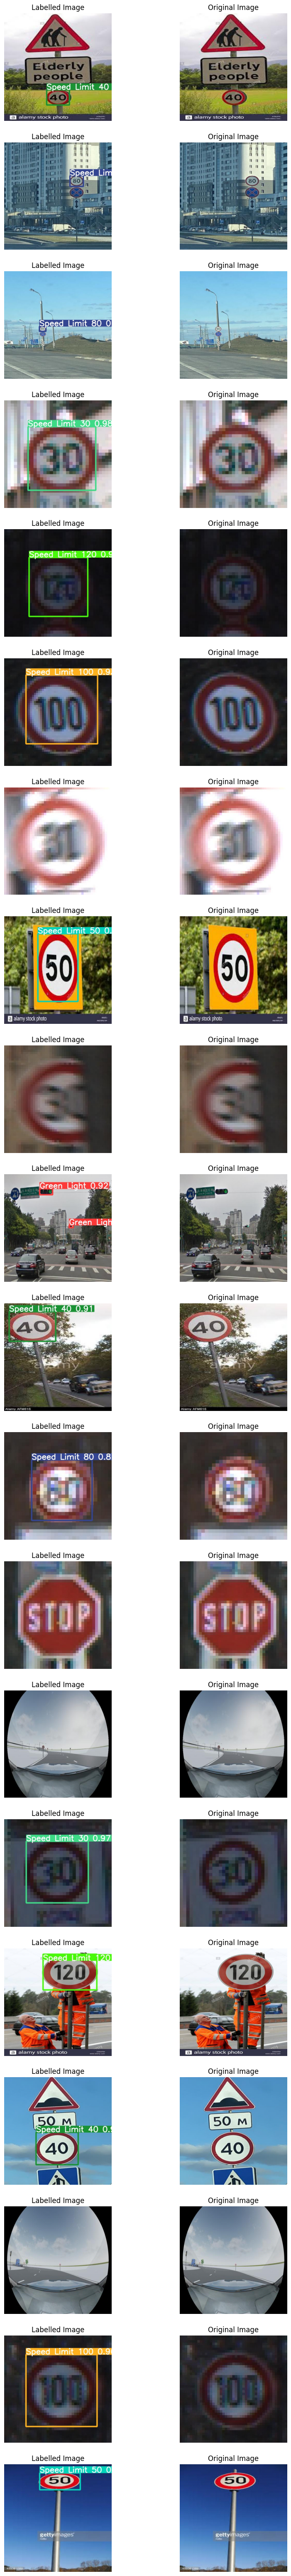

In [29]:
show_test(detect_dir, original_dir, image_files, 20)